# 决策树 


本节代码来自: **黄海广-机器学习** https://github.com/fengdu78/WZU-machine-learning-course 推荐自学 


决策树学习算法包括3部分：特征选择、树的生成和树的剪枝。常用的算法有ID3、
C4.5和CART。


特征选择的目的在于选取对训练数据能够分类的特征。特征选择的关键是其准则。常用的准则如下：

（1）样本集合$D$对特征$A$的信息增益（ID3）


$$g(D, A)=H(D)-H(D|A)$$

$$H(D)=-\sum_{k=1}^{K} \frac{\left|C_{k}\right|}{|D|} \log _{2} \frac{\left|C_{k}\right|}{|D|}$$

$$H(D | A)=\sum_{i=1}^{n} \frac{\left|D_{i}\right|}{|D|} H\left(D_{i}\right)$$

其中，$H(D)$是数据集$D$的熵，$H(D_i)$是数据集$D_i$的熵，$H(D|A)$是数据集$D$对特征$A$的条件熵。$D_i$是$D$中特征$A$取第$i$个值的样本子集，$C_k$是$D$中属于第$k$类的样本子集。$n$是特征$A$取 值的个数，$K$是类的个数。

（2）样本集合$D$对特征$A$的信息增益比（C4.5）


$$g_{R}(D, A)=\frac{g(D, A)}{H(D)}$$


其中，$g(D,A)$是信息增益，$H(D)$是数据集$D$的熵。

（3）样本集合$D$的基尼指数（CART）

$$\operatorname{Gini}(D)=1-\sum_{k=1}^{K}\left(\frac{\left|C_{k}\right|}{|D|}\right)^{2}$$

特征$A$条件下集合$D$的基尼指数：

 $$\operatorname{Gini}(D, A)=\frac{\left|D_{1}\right|}{|D|} \operatorname{Gini}\left(D_{1}\right)+\frac{\left|D_{2}\right|}{|D|} \operatorname{Gini}\left(D_{2}\right)$$


## 1 ID3算法实现-相亲见面

### 1.1 创建数据集

In [1]:
import numpy as np
import pandas as pd 
import math 
from math import log

def create_data():
    datasets = [['青年', '否', '否', '一般', '否'],
               ['青年', '否', '否', '好', '否'],
               ['青年', '是', '否', '好', '是'],
               ['青年', '是', '是', '一般', '是'],
               ['青年', '否', '否', '一般', '否'],
               ['中年', '否', '否', '一般', '否'],
               ['中年', '否', '否', '好', '否'],
               ['中年', '是', '是', '好', '是'],
               ['中年', '否', '是', '非常好', '是'],
               ['中年', '否', '是', '非常好', '是'],
               ['老年', '否', '是', '非常好', '是'],
               ['老年', '否', '是', '好', '是'],
               ['老年', '是', '否', '好', '是'],
               ['老年', '是', '否', '非常好', '是'],
               ['老年', '否', '否', '一般', '否'],
               ]
    labels = ['年龄', '有工作', '有自己的房子', '信贷情况', '类别']
    # 返回数据集和每个维度的名称
    return datasets, labels

datasets, labels = create_data()


### 1.2 计算熵

In [2]:
def calc_ent(datasets):
    data_length = len(datasets)
    label_count = {}
    for i in range(data_length):
        label = datasets[i][-1]
        if label not in label_count:
            label_count[label] = 0
        label_count[label] += 1
    ent = -sum([(p / data_length) * log(p / data_length, 2)
                for p in label_count.values()])
    return ent

In [3]:
calc_ent(datasets)

0.9709505944546686

### 1.3 计算条件熵

In [4]:
def cond_ent(datasets, axis=3):
    data_length = len(datasets)
    feature_sets = {}
    for i in range(data_length):
        feature = datasets[i][axis]
        if feature not in feature_sets:
            feature_sets[feature] = []
        feature_sets[feature].append(datasets[i])
    cond_ent = sum([(len(p) / data_length) * calc_ent(p)
                    for p in feature_sets.values()])
    return cond_ent

In [5]:
# 计算年龄的条件熵
cond_ent(datasets,axis=0)

0.8879430945988998

### 1.3 计算信息增益

In [6]:
def info_gain(ent, cond_ent):
    return ent - cond_ent

# 计算年龄的信息增益
info_gain(calc_ent(datasets),cond_ent(datasets,axis=0))

0.08300749985576883

In [7]:
def info_gain_train(datasets):
    count = len(datasets[0]) - 1
    ent = calc_ent(datasets)
    best_feature = []
    for c in range(count):
        c_info_gain = info_gain(ent, cond_ent(datasets, axis=c))
        best_feature.append((c, c_info_gain))
        print('特征({}) 的信息增益为： {:.3f}'.format(labels[c], c_info_gain))
    # 比较大小
    best_ = max(best_feature, key=lambda x: x[-1])
    return '特征({})的信息增益最大，选择为根节点特征'.format(labels[best_[0]])

In [8]:
info_gain_train(np.array(datasets))

特征(年龄) 的信息增益为： 0.083
特征(有工作) 的信息增益为： 0.324
特征(有自己的房子) 的信息增益为： 0.420
特征(信贷情况) 的信息增益为： 0.363


'特征(有自己的房子)的信息增益最大，选择为根节点特征'

### 1.6 使用sklearn中决策树分类 

编码处理数据：https://www.imooc.com/wenda/detail/655711

In [9]:
from sklearn.tree import DecisionTreeClassifier 
train_data = pd.DataFrame(datasets, columns=labels)
new_data = pd.get_dummies(train_data) 

new_data

,年龄_中年,年龄_老年,年龄_青年,有工作_否,有工作_是,有自己的房子_否,有自己的房子_是,信贷情况_一般,信贷情况_好,信贷情况_非常好,类别_否,类别_是
0,0,0,1,1,0,1,0,1,0,0,1,0
1,0,0,1,1,0,1,0,0,1,0,1,0
2,0,0,1,0,1,1,0,0,1,0,0,1
3,0,0,1,0,1,0,1,1,0,0,0,1
4,0,0,1,1,0,1,0,1,0,0,1,0
5,1,0,0,1,0,1,0,1,0,0,1,0
6,1,0,0,1,0,1,0,0,1,0,1,0
7,1,0,0,0,1,0,1,0,1,0,0,1
8,1,0,0,1,0,0,1,0,0,1,0,1
9,1,0,0,1,0,0,1,0,0,1,0,1


In [10]:
X,y = np.array(new_data)[:,:-2],np.array(new_data)[:,-2:]
clf = DecisionTreeClassifier(criterion='entropy') 
clf.fit(X,y)
clf.predict([[1,0,0,0,1,1,0,1,0,0]]) # 中年 没工作 有房 信用一般

array([[0, 1]], dtype=uint8)

## 2 决策树-鸢尾花数据集分类

In [11]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 

iris = load_iris()  # 加载鸢尾花数据集
X = iris.data  # 样本特征
y = iris.target  # 样本标签
# X = X[:,:2]  # 选择前两个特征
# X[:3]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
tree_clf = DecisionTreeClassifier(random_state=2023)

tree_clf.fit(X_train, y_train)
tree_clf.score(X_test, y_test)

0.8888888888888888

In [ ]:
!python -m pip install graphviz pydotplus

In [ ]:
import graphviz
from sklearn import tree
tree.plot_tree(clf)

如果出现[**GraphViz‘s executables not found的解决方法**](https://blog.csdn.net/qq_40304090/article/details/88594813)，参考博客解决。


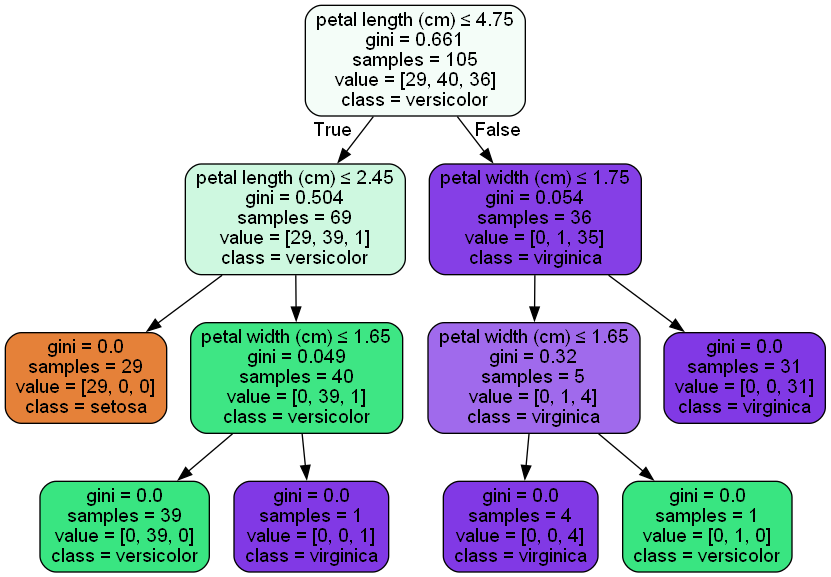

In [15]:
from IPython.display import Image  
from sklearn import tree
import pydotplus 
dot_data = tree.export_graphviz(tree_clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 


In [16]:
from sklearn.model_selection import GridSearchCV
# 用GridSearchCV寻找最优参数（字典）
param = {
    'criterion': ['gini',"entropy"],
    'max_depth': [2, 3, 5, 10]
    # 'min_samples_leaf': [2, 3, 5, 10],
    # 'min_impurity_decrease': [0.1, 0.2, 0.5]
}
grid = GridSearchCV(DecisionTreeClassifier(), param_grid=param, cv=6)
grid.fit(X, y)
print('最优分类器:', grid.best_params_, '最优分数:', grid.best_score_)  # 得到最优的参数和分值

最优分类器: {'criterion': 'gini', 'max_depth': 5} 最优分数: 0.9533333333333333
